<a href="https://colab.research.google.com/github/veritaem/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header = None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [28]:
print(df.shape)
df.describe()

(306, 4)


,Patient age,Operation year,# of positive axillary nodes,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
df.isna().sum().sum()

In [0]:
df.columns = ['Patient age', 'Operation year', '# of positive axillary nodes', 'Survival status']
df.head()

In [25]:
df['Survival status'].replace(2, 0, inplace = True)
df.head()

,Patient age,Operation year,# of positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
Age_bins = pd.cut(df['Patient age'], 5)
Op_Year_bins = pd.cut(df['Operation year'], 5)
ax_node_bins = pd.IntervalIndex.from_tuples([(-1, 3.1), (3.9, 20.1), (20.9, 52.1)])
Ax_node_bins = pd.cut(df['# of positive axillary nodes'], ax_node_bins)

In [161]:
ct_na = pd.crosstab(Ax_node_bins, Age_bins)
ct_ns = pd.crosstab(Ax_node_bins, df['Survival status'])
ct_as = pd.crosstab(Age_bins, df['Survival status'])
ct_os = pd.crosstab(Op_Year_bins, df['Survival status'])
ct_an = pd.crosstab(Age_bins, Ax_node_bins)
ct_na

Patient age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
# of positive axillary nodes,,,,,
"(-1.0, 3.1]",30,68,65,45,9
"(3.9, 20.1]",11,28,25,11,0
"(20.9, 52.1]",2,3,6,3,0


In [162]:
ct_ns

Survival status,0,1
# of positive axillary nodes,,
"(-1.0, 3.1]",39,178
"(3.9, 20.1]",34,41
"(20.9, 52.1]",8,6


In [163]:
ct_as

Survival status,0,1
Patient age,,
"(29.947, 40.6]",4,39
"(40.6, 51.2]",31,68
"(51.2, 61.8]",27,69
"(61.8, 72.4]",16,43
"(72.4, 83.0]",3,6


In [164]:
ct_os

Survival status,0,1
Operation year,,
"(57.989, 60.2]",25,66
"(60.2, 62.4]",10,39
"(62.4, 64.6]",16,45
"(64.6, 66.8]",19,37
"(66.8, 69.0]",11,38


In [165]:
ct_an

# of positive axillary nodes,"(-1.0, 3.1]","(3.9, 20.1]","(20.9, 52.1]"
Patient age,,,
"(29.947, 40.6]",30,11,2
"(40.6, 51.2]",68,28,3
"(51.2, 61.8]",65,25,6
"(61.8, 72.4]",45,11,3
"(72.4, 83.0]",9,0,0


Text(0,0.5,'survivor count')

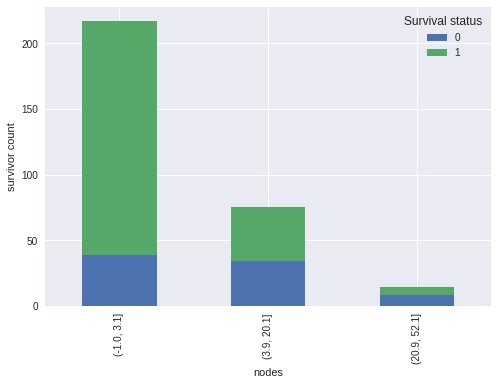

In [166]:
ct_ns.plot(kind = 'bar', stacked = True)
plt.xlabel('nodes')
plt.ylabel('survivor count')

Text(0.5,1,'how have techniques improved over time?')

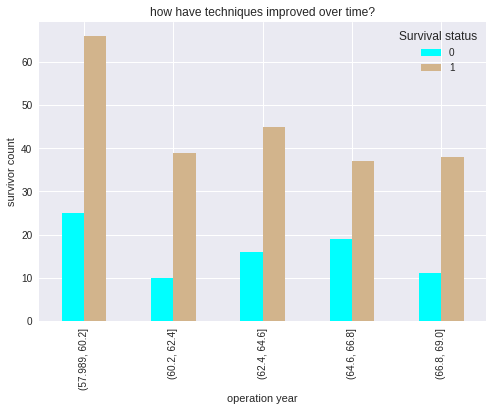

In [167]:
ct_os.plot(kind = 'bar', stacked = False, color = ('cyan', 'tan'))
plt.xlabel('operation year')
plt.ylabel('survivor count')
plt.title('how have techniques improved over time?')


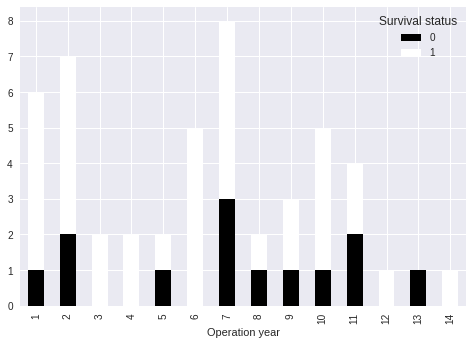

In [168]:
oga = df['Operation year'].groupby(df['Patient age'])
oga1 = oga.count()
ct_ogas = pd.crosstab(oga1, df['Survival status'])
ct_ogas.plot(kind = 'bar', stacked = True, color = ('black', 'white'))

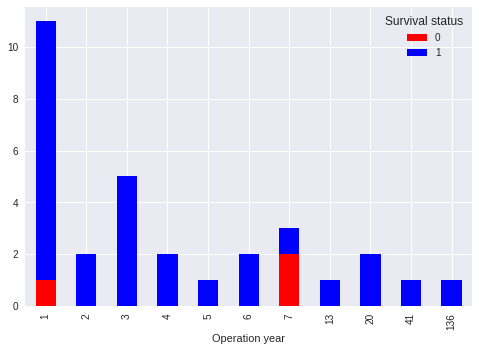

In [169]:
ogn = df['Operation year'].groupby(df['# of positive axillary nodes'])
ogn1 = ogn.count()
ct_ogns = pd.crosstab(ogn1, df['Survival status'])
ct_ogns.plot(kind = 'bar', stacked = True, color = ('red', 'blue'))


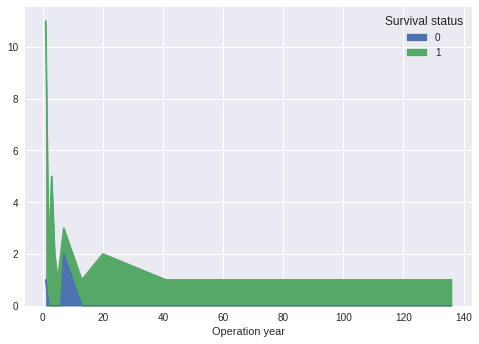

In [185]:
ct_ogns.plot.area()

<function matplotlib.pyplot.show>

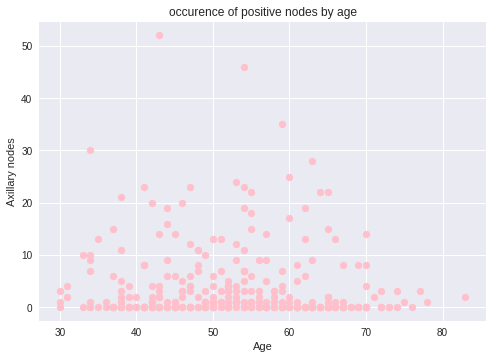

In [170]:
# TODO

plt.scatter(df['Patient age'], df['# of positive axillary nodes'], color = 'pink')
plt.xlabel('Age')
plt.ylabel('Axillary nodes')
plt.title('occurence of positive nodes by age')
plt.show

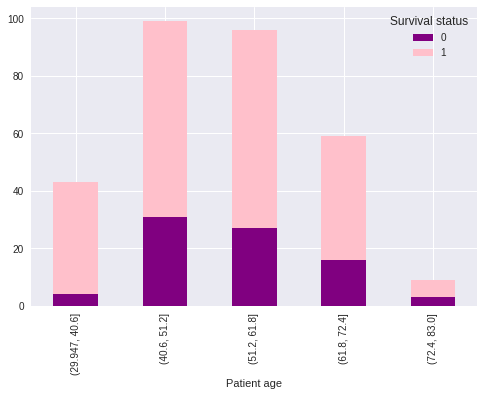

In [171]:
ct_as.plot(kind= 'bar', stacked = True, color = ('purple', 'pink'))


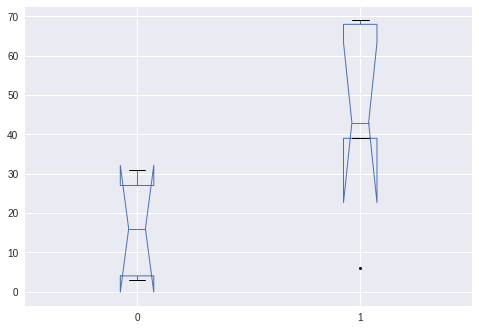

In [172]:
ctbp = ct_as.boxplot(notch = True, sym = 'k.', showfliers = True, whis = .5)

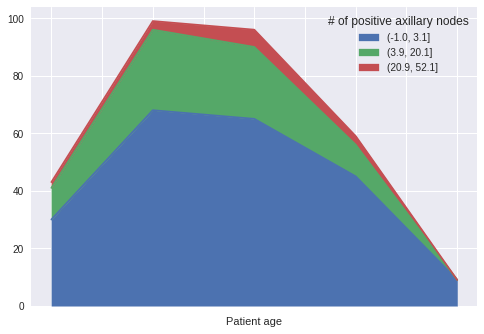

In [173]:
ct_an.plot.area()

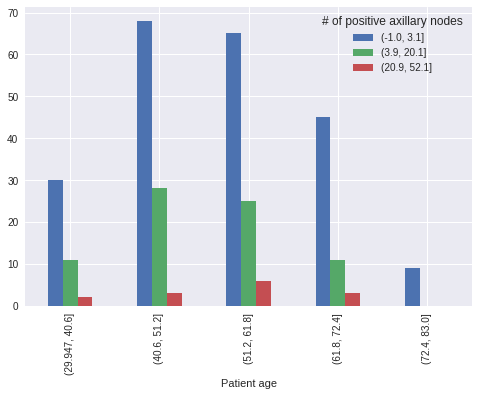

In [174]:
ct_an.plot(kind = 'bar', stacked = False)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1)  One of the features that seems to jive with survivial pretty clearly is age, as ct_as (crosstab of age and survival) shows the rates decreased from about 1 in 10 dying at young ages to about 33% at later years even after the operation, suggesting the sooner and more often you get checked, the better your chance of survival!  So go get check ups!  

Another one seems correlated and that is operation year.  Except for some outliers, survival chance increases as your go, showing that technology is catching up to this problem found in nature, which is good news for us!

2) a feature that looks to have a negative correlation with survival is axillary nodes, whatever those are, as ct_ns (nodes crosstabbed with survival) shows a negative trend, with the more nodes the smaller the survival chance of even 5 years.  They seem to be clustered around middle age, which is a sign that especially those just before or entering middle age need to be checked regularly, because this seems to be the danger area.

3) my area chart and bar chart for ct_an (age and nodes crosstabbed) shows that as age goes up, you are more likely to go into the smaller bins, which means that these two are correlated as shown by my scatter chart, wherein variance is medium in the early years, peaks in middle age but falls off late.  this could be because the people with higher nodes may show signs of cancer earlier to begin with, suggesting that age/lifestyle and breast cancer may be linked, but we just dont have that data in this set.

